In [1]:
import ast
import os

from typing import Annotated, TypedDict

from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.tools import tool
from langchain_ollama import ChatOllama

from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


In [2]:
@tool
def calculator(query: str) -> str:
    """A simple calculator tool. Input should be a mathematical expression."""
    return ast.literal_eval(query)

In [3]:
os.environ["HTTP_PROXY"] = "http://localhost:10086"
os.environ["HTTPS_PROXY"] = "http://localhost:10086"

search = DuckDuckGoSearchRun()

In [4]:
tools = [search, calculator]

In [5]:
model = ChatOllama(
    base_url="http://localhost:11434", model="qwen2.5:32b", temperature=0.1
).bind_tools(tools)

In [6]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [7]:
def model_node(state: State) -> State:
    res = model.invoke(state["messages"])
    return {"messages": res}

In [8]:
builder = StateGraph(State)
builder.add_node("model", model_node)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "model")
builder.add_conditional_edges("model", tools_condition)
builder.add_edge("tools", "model")

graph = builder.compile()

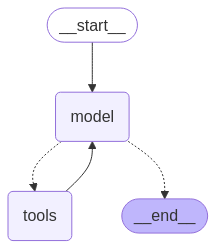

In [9]:
graph

In [10]:
from langchain_core.messages import HumanMessage, SystemMessage

input = {
    "messages": [
        HumanMessage("""How old was the 30th president of the United States when he died?""")
    ]
}
for c in graph.stream(input):
    print(c)

{'model': {'messages': AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen2.5:32b', 'created_at': '2025-03-08T14:21:26.739782Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2293055417, 'load_duration': 29924125, 'prompt_eval_count': 249, 'prompt_eval_duration': 498000000, 'eval_count': 36, 'eval_duration': 1761000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-48284837-7e69-4586-bb16-804c8d811e2e-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'age of the 30th president of the United States when he died'}, 'id': '6ea93ad4-1c9a-4410-97fe-8885892c7b83', 'type': 'tool_call'}], usage_metadata={'input_tokens': 249, 'output_tokens': 36, 'total_tokens': 285})}}
{'tools': {'messages': [ToolMessage(content="John Calvin Coolidge Jr. [1] (/ ˈ k uː l ɪ dʒ / KOOL-ij; July 4, 1872 - January 5, 1933) was the 30th president of the United States, serving from 1923 to 1929.A Republican lawyer from Massachu

In [ ]:
{
    "model": {
        "messages": AIMessage(
            content="",
            additional_kwargs={},
            response_metadata={
                "model": "qwen2.5:32b",
                "created_at": "2025-03-08T14:21:26.739782Z",
                "done": True,
                "done_reason": "stop",
                "total_duration": 2293055417,
                "load_duration": 29924125,
                "prompt_eval_count": 249,
                "prompt_eval_duration": 498000000,
                "eval_count": 36,
                "eval_duration": 1761000000,
                "message": Message(
                    role="assistant", content="", images=None, tool_calls=None
                ),
            },
            id="run-48284837-7e69-4586-bb16-804c8d811e2e-0",
            tool_calls=[
                {
                    "name": "duckduckgo_search",
                    "args": {
                        "query": "age of the 30th president of the United States when he died"
                    },
                    "id": "6ea93ad4-1c9a-4410-97fe-8885892c7b83",
                    "type": "tool_call",
                }
            ],
            usage_metadata={
                "input_tokens": 249,
                "output_tokens": 36,
                "total_tokens": 285,
            },
        )
    }
}
{
    "tools": {
        "messages": [
            ToolMessage(
                content="John Calvin Coolidge Jr. [1] (/ ˈ k uː l ɪ dʒ / KOOL-ij; July 4, 1872 - January 5, 1933) was the 30th president of the United States, serving from 1923 to 1929.A Republican lawyer from Massachusetts, he previously served as the 29th vice president from 1921 to 1923 under President Warren G. Harding, and as the 48th governor of Massachusetts from 1919 to 1921. Calvin Coolidge was the 30th president of the United States (1923-29). Coolidge acceded to the presidency after the death in office of Warren G. Harding, just as the Harding scandals were coming to light. He restored integrity to the executive branch while continuing Harding's conservative pro-business policies. John Calvin Coolidge Jr. was the 30th President of the United States (1923-29). A Republican lawyer from Vermont, Coolidge worked his way up the ladder of Massachusetts state politics, eventually becoming governor of that state. ... Coolidge's retirement was relatively short, as he died at the age of 60 in January 1933, less than two months ... The White House, official residence of the president of the United States, in July 2008. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of ... Age of U.S. presidents when assuming office. Article Two of the United States Constitution provides that U.S. presidents must be at least 35 years old at the time they take office. The median age at inauguration of incoming U.S. presidents is 55 years. [1] [2] The youngest person to become U.S. president was Theodore Roosevelt at age 42, who succeeded to the office after the assassination of ...",
                name="duckduckgo_search",
                id="a14a2ab3-8ae1-4e0c-b532-acba495550d2",
                tool_call_id="6ea93ad4-1c9a-4410-97fe-8885892c7b83",
            )
        ]
    }
}
{
    "model": {
        "messages": AIMessage(
            content="The 30th President of the United States, Calvin Coolidge, died at the age of 60.",
            additional_kwargs={},
            response_metadata={
                "model": "qwen2.5:32b",
                "created_at": "2025-03-08T14:21:32.628988Z",
                "done": True,
                "done_reason": "stop",
                "total_duration": 4528560459,
                "load_duration": 71451709,
                "prompt_eval_count": 758,
                "prompt_eval_duration": 3169000000,
                "eval_count": 25,
                "eval_duration": 1273000000,
                "message": Message(
                    role="assistant",
                    content="The 30th President of the United States, Calvin Coolidge, died at the age of 60.",
                    images=None,
                    tool_calls=None,
                ),
            },
            id="run-8ca49246-25ed-45be-8eea-ffa1a4d84cb3-0",
            usage_metadata={
                "input_tokens": 758,
                "output_tokens": 25,
                "total_tokens": 783,
            },
        )
    }
}